<a href="https://colab.research.google.com/github/Gabrieldiasdeoliveira/SERIES-TEMPORAIS-FEED-FORWARD/blob/main/S%C3%89RIES_TEMPORAIS_COM_REDES_NEURAIS_ALIMENTADAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Time Series:
Start = 1880 
End = 2015 
Frequency = 1 
  [1] -0.20 -0.11 -0.10 -0.20 -0.28 -0.31 -0.30 -0.33 -0.20 -0.11 -0.37 -0.24
 [13] -0.27 -0.30 -0.31 -0.22 -0.15 -0.11 -0.28 -0.16 -0.09 -0.15 -0.28 -0.36
 [25] -0.45 -0.28 -0.23 -0.40 -0.44 -0.47 -0.43 -0.44 -0.35 -0.35 -0.16 -0.11
 [37] -0.33 -0.40 -0.26 -0.23 -0.26 -0.21 -0.27 -0.24 -0.28 -0.20 -0.09 -0.20
 [49] -0.21 -0.36 -0.13 -0.09 -0.17 -0.28 -0.13 -0.19 -0.15 -0.02 -0.02 -0.03
 [61]  0.08  0.13  0.10  0.14  0.26  0.12 -0.03 -0.04 -0.09 -0.09 -0.17 -0.06
 [73]  0.01  0.08 -0.12 -0.14 -0.20  0.03  0.06  0.03 -0.03  0.05  0.02  0.06
 [85] -0.20 -0.10 -0.05 -0.02 -0.07  0.07  0.03 -0.09  0.01  0.15 -0.08 -0.01
 [97] -0.11  0.18  0.07  0.16  0.27  0.32  0.13  0.31  0.16  0.12  0.19  0.33
[109]  0.40  0.28  0.44  0.42  0.23  0.24  0.32  0.46  0.34  0.48  0.63  0.42
[121]  0.42  0.55  0.63  0.62  0.55  0.69  0.63  0.66  0.54  0.64  0.72  0.60
[133]  0.63  0.66  0.75  0.87


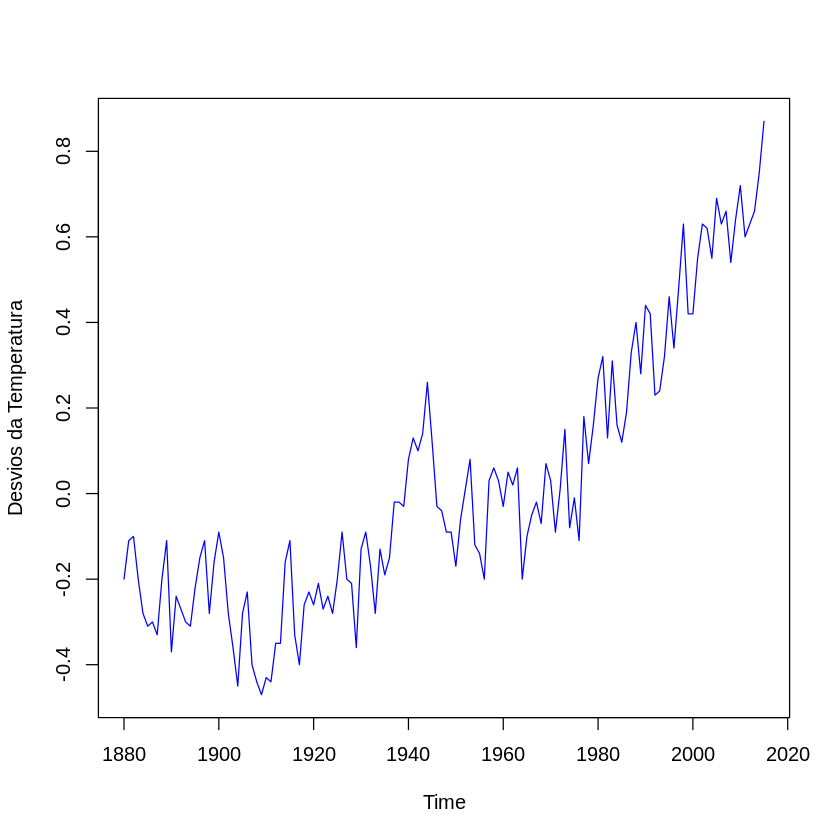

In [1]:
###################################################################
###    SÉRIES TEMPORAIS COM REDES NEURAIS ALIMENTADAS ADIANTE   ###
###           (FEED-FORWARD) COM UMA CAMADA OCULTA              ###
###################################################################

###############################################
######   Desvios da Temperatura Global   ######
###############################################

### IMPORTAÇÃO DA SÉRIE TEMPORAL

install.packages('astsa')
library(astsa)
?globtemp
temp_global <- ts(globtemp, start = 1880, end = 2015,
                  frequency = 1)
print(temp_global)
plot(temp_global, type="l", ylab="Desvios da Temperatura",
     col="blue")

In [3]:
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’




In [ ]:
### CRIAÇÃO DO MODELO
library(forecast)
?nnetar
modelo <- nnetar(temp_global,p = 19, size = 10)
print(modelo)

checkresiduals(modelo)

plot(temp_global)
lines(temp_global-modelo$resid, col= "red")

In [ ]:
### PREVISÃO
previsao <- forecast(modelo, h = 12)
print(previsao)

plot(previsao)
lines(temp_global-modelo$resid, col= "red")

In [ ]:
### CRIAÇÃO DE UM DATAFRAME COM VALORES REAIS E AJUSTADOS

library(dplyr)
ajuste <- fitted.values(modelo)
print(ajuste)

metrica <- as.data.frame(ajuste)
View(metrica)

metrica <- rename(metrica, valores_ajustados = x)
metrica$valores_reais <- temp_global
metrica <- slice(metrica, -c(1:19))

In [ ]:
### MÉTRICAS DE DESEMPENHO ###

install.packages('MLmetrics')
library(MLmetrics)


In [ ]:

# ERRO MÉDIO ABSOLUTO (MAE)
MAE(metrica$valores_ajustados, metrica$valores_reais)

# ERRO QUADRÁTICO MÉDIO (MSE)
MSE(metrica$valores_ajustados, metrica$valores_reais)

# RAIZ DO ERRO QUADRÁTICO MÉDIO (RMSE)
RMSE(metrica$valores_ajustados, metrica$valores_reais)

In [ ]:
# SEPARANDO EM DADOS DE TREINO E TESTE

# Desvios da Temperatura Global

# TREINO
temp_treino <- ts(globtemp, start = 1880, end = 2000,
                  frequency = 1)
print(temp_treino)

In [ ]:
# TESTE
library(dplyr)
temp_teste <- globtemp
print(temp_teste)
temp_teste <- as.data.frame(temp_teste)
View(temp_teste)
temp_teste <- slice(temp_teste, c(122:136))

In [ ]:
# Criação do Modelo
modelo2 <- nnetar(temp_treino,p = 19, size = 10)
print(modelo2)

In [ ]:
### PREVISÃO
previsao2 <- forecast(modelo2, h=15)
plot(previsao2)

In [ ]:
### CRIAÇÃO DE UM DATAFRAME COM VALORES REAIS E PREVISTOS

previsao2 <- as.data.frame(previsao2)
View(previsao2)

In [ ]:
### MÉTRICAS DE DESEMPENHO ###

# Juntar dois dataframes
metrica2 <- bind_cols(previsao2,temp_teste)
View(metrica2)

metrica2 <- rename(metrica2, previsao = 'Point Forecast')
metrica2 <- rename(metrica2, real = x)

glimpse(metrica2)

In [ ]:
library(MLmetrics)
# ERRO MÉDIO ABSOLUTO (MAE)
MAE(metrica2$previsao, metrica2$real)

# ERRO QUADRÁTICO MÉDIO (MSE)
MSE(metrica2$previsao, metrica2$real)

# RAIZ DO ERRO QUADRÁTICO MÉDIO (RMSE)
RMSE(metrica2$previsao, metrica2$real)


